# WMS Analysis Example

This example extracts a Sea Surface Temperature map from an NEII OGC Web Map Service. The map is then processed using matplotlib and numpy to plot a temperature distribution graph.

**Disclaimer:** This is not a rigorous scientific analysis but is inteneded to demonstrate interaction with an OGC Web Map Service and use of the Matplotlib Python library.

## Step 1: Import the OWSLib WebMapService class and connect to the WMS

In [262]:
from owslib.wms import WebMapService

In [263]:
wms=WebMapService('http://ereeftds.bom.gov.au/ereefs/tds/wms/ereefs/RT2_gridAgg_P1D_SST')

## Step 2: Investigate the layers of the WMS

List the available layers (wms.contents):

In [264]:
list(wms.contents) 

['sst1day',
 'ssta1day',
 'ssta_leg1day',
 'sst_mosaic',
 'ssta_mosaic_imos',
 'ssta_mosaic_leg']

Examine the bounding box for a layer (the 'sst_mosaic' layer).

In [269]:
wms['sst_mosaic'].boundingBox

(142.00999450683594,
 -25.489999771118164,
 155.99000549316406,
 -9.510000228881836,
 'EPSG:4326')

Get the available times for a layer using the *timepositions* property.

In [10]:
times=wms['sst_mosaic'].timepositions 

There are a lot of timesteps available so lets look at the last 10.

In [11]:
len(times) #total number of timesteps

5691

In [12]:
times[-10:] #last ten timesteps (using python slice notation)

['2017-10-21T15:20:00.000Z',
 '2017-10-22T15:20:00.000Z',
 '2017-10-23T15:20:00.000Z',
 '2017-10-24T15:20:00.000Z',
 '2017-10-25T15:20:00.000Z',
 '2017-10-26T15:20:00.000Z',
 '2017-10-27T15:20:00.000Z',
 '2017-10-28T15:20:00.000Z',
 '2017-10-29T15:20:00.000Z',
 '2017-10-30T15:20:00.000Z']

In [ ]:
Assign the most recent time to a variable to use in our GetMap request later.

In [195]:
most_recent_date=times[-1:][0]

Examine the styles (colours and rendering) available for this WMS layer 

In [270]:
wms['sst_mosaic'].styles

{'boxfill/alg': {'legend': 'http://ereeftds.bom.gov.au/ereefs/tds/wms/ereefs/RT2_gridAgg_P1D_SST?REQUEST=GetLegendGraphic&LAYER=sst_mosaic&PALETTE=alg',
  'title': 'boxfill/alg'},
 'boxfill/alg2': {'legend': 'http://ereeftds.bom.gov.au/ereefs/tds/wms/ereefs/RT2_gridAgg_P1D_SST?REQUEST=GetLegendGraphic&LAYER=sst_mosaic&PALETTE=alg2',
  'title': 'boxfill/alg2'},
 'boxfill/days_monthly': {'legend': 'http://ereeftds.bom.gov.au/ereefs/tds/wms/ereefs/RT2_gridAgg_P1D_SST?REQUEST=GetLegendGraphic&LAYER=sst_mosaic&PALETTE=days_monthly',
  'title': 'boxfill/days_monthly'},
 'boxfill/days_seasonaly': {'legend': 'http://ereeftds.bom.gov.au/ereefs/tds/wms/ereefs/RT2_gridAgg_P1D_SST?REQUEST=GetLegendGraphic&LAYER=sst_mosaic&PALETTE=days_seasonaly',
  'title': 'boxfill/days_seasonaly'},
 'boxfill/days_weekly': {'legend': 'http://ereeftds.bom.gov.au/ereefs/tds/wms/ereefs/RT2_gridAgg_P1D_SST?REQUEST=GetLegendGraphic&LAYER=sst_mosaic&PALETTE=days_weekly',
  'title': 'boxfill/days_weekly'},
 'boxfill/day

Examine the formats available:

In [275]:
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'image/png;mode=32bit',
 'image/gif',
 'image/jpeg',
 'application/vnd.google-earth.kmz']

## Step 3: Make a GetMap request and view the response

Now we have some information about the available layers, formats, bounding box etc. we can make a GetMap request to the WMS using the wms.getmap function.

In [277]:
img = wms.getmap(layers = ['sst_mosaic'],
                 srs='EPSG:4326',
                 bbox=(142.00999450683594,-25.489999771118164,155.99000549316406,-9.510000228881836),
                 size=(500,500),
                 format='image/png',time=most_recent_date,style='boxfill/occam',
                transparent = True)

And write the image to a file:

In [278]:
out=open('sst_map.png', 'wb') #opens a file for writing.

In [279]:
out.write(img.read()) #writes the image object contents to the file.

51001

Now the image can be viewed:

In [280]:
from IPython.display import Image

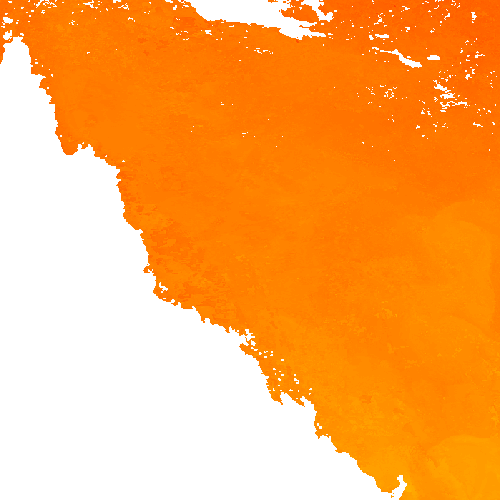

In [281]:
Image('sst_map.png')

One problem with this map is that the colours have all fallen within the orange-red part of the colour scale so it's hard to interpret visually. Using Matplotlib we can change this and also start to look at the data contained within the image.

## Step 4: Use MatPlotLib to vary the image properties

This line just tells jupyter to plot matplotlib figures inside the notebook.

In [283]:
%matplotlib inline

Import the matplotlib plotting  and image libraries and set the default image size

In [284]:
import matplotlib.pyplot as plt 

In [285]:
import matplotlib.image as mpimg #and the image library

In [286]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

Now read the image into a matplotlib image object

In [287]:
sst_img=mpimg.imread('sst_map.png') 

Looking at the dimensions of the image we can see the png has 4 layers

In [288]:
sst_img.shape #look at the dimensions of the image - it has 4 layers

(500, 500, 4)

Looking at each of these layers (0 to 3) you can see that layer 0 contains all '1's, layer 1 contains the data values and layers 2 and 3 both show the land/sea areas.

### Layer 0

In [296]:
sst_img[:,:,0]

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]], dtype=float32)

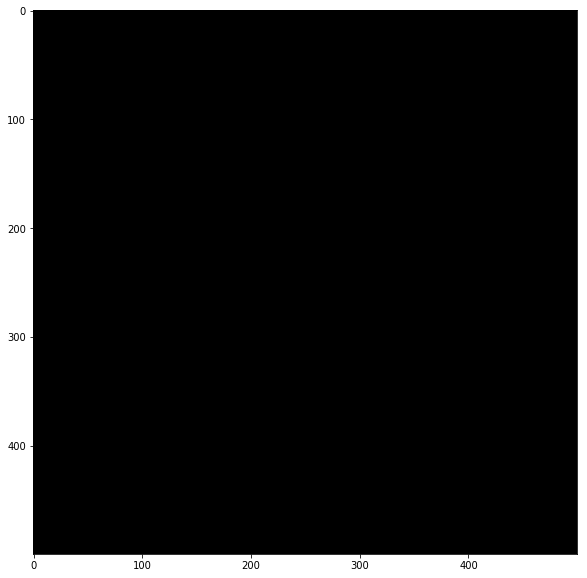

In [292]:
plt.imshow(sst_img[:,:,0],cmap='gray') 

### Layer 1

In [297]:
sst_img[:,:,1]

array([[ 0.46666667,  0.43529412,  0.43529412, ...,  0.3882353 ,
         0.3882353 ,  0.3882353 ],
       [ 0.46666667,  0.43529412,  0.43529412, ...,  0.3882353 ,
         0.3882353 ,  0.3882353 ],
       [ 0.43529412,  0.43529412,  0.41960785, ...,  0.40392157,
         0.3882353 ,  0.3882353 ],
       ..., 
       [ 1.        ,  1.        ,  1.        , ...,  0.62352943,
         0.62352943,  0.62352943],
       [ 1.        ,  1.        ,  1.        , ...,  0.60784316,
         0.60784316,  0.60784316],
       [ 1.        ,  1.        ,  1.        , ...,  0.59215689,
         0.59215689,  0.59215689]], dtype=float32)

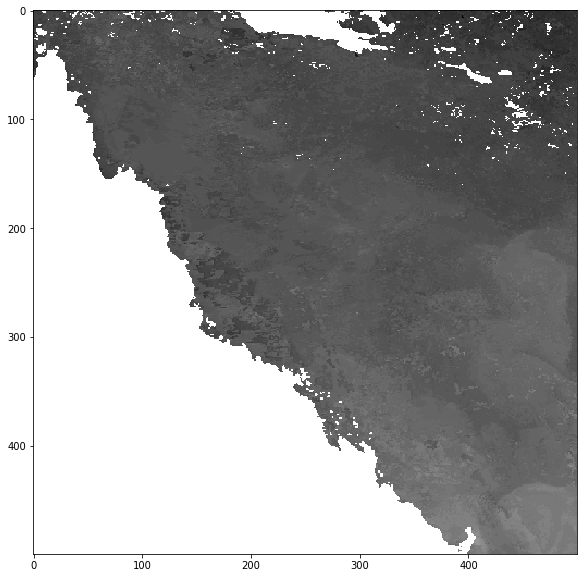

In [298]:
plt.imshow(sst_img[:,:,1],cmap='gray')

### Layer 2

In [299]:
sst_img[:,:,2]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.]], dtype=float32)

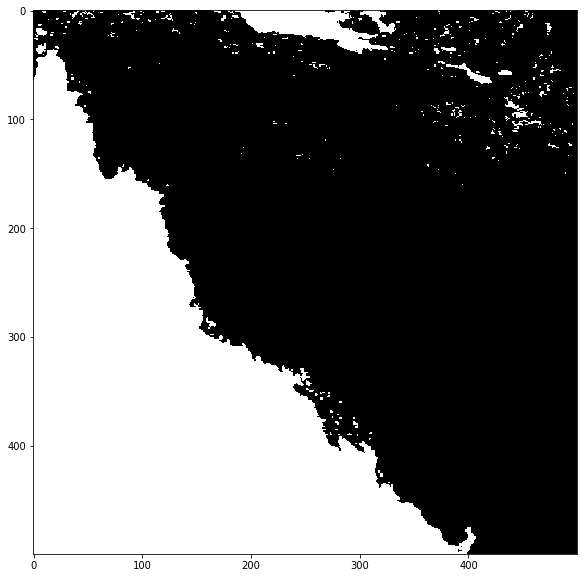

In [300]:
plt.imshow(sst_img[:,:,2],cmap='gray')

### Layer 3

In [301]:
sst_img[:,:,3]

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.]], dtype=float32)

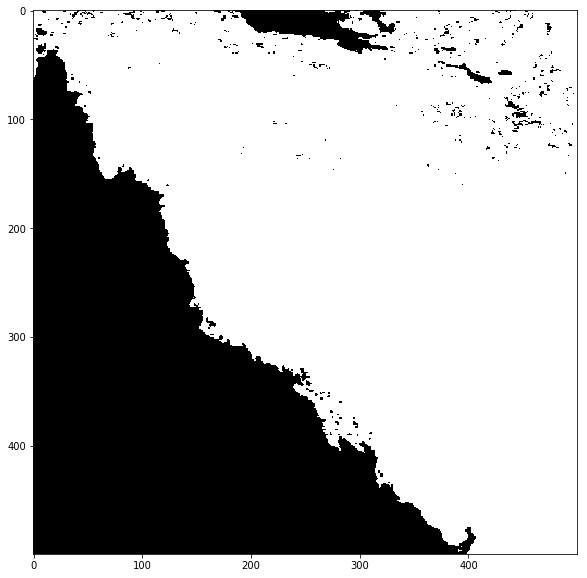

In [302]:
plt.imshow(sst_img[:,:,3],cmap='gray')

### Plotting the data from layer 1

Lets plot the data values in layer 1. This is done by using Numpy.

In [317]:
import numpy.ma as ma

In [318]:
sst_data=sst_img[:,:,1]

We need to mask out the '1' values as they represent no data.

In [327]:
sst_data=ma.masked_where(sst_data>=1, sst_data)

In [328]:
sst_data

masked_array(data =
 [[0.46666666865348816 0.43529412150382996 0.43529412150382996 ...,
  0.38823530077934265 0.38823530077934265 0.38823530077934265]
 [0.46666666865348816 0.43529412150382996 0.43529412150382996 ...,
  0.38823530077934265 0.38823530077934265 0.38823530077934265]
 [0.43529412150382996 0.43529412150382996 0.41960784792900085 ...,
  0.40392157435417175 0.38823530077934265 0.38823530077934265]
 ..., 
 [-- -- -- ..., 0.6235294342041016 0.6235294342041016 0.6235294342041016]
 [-- -- -- ..., 0.6078431606292725 0.6078431606292725 0.6078431606292725]
 [-- -- -- ..., 0.5921568870544434 0.5921568870544434 0.5921568870544434]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]],
       fill_value = 1e+20)

Now the data can be re-plotted without all the 1 values.

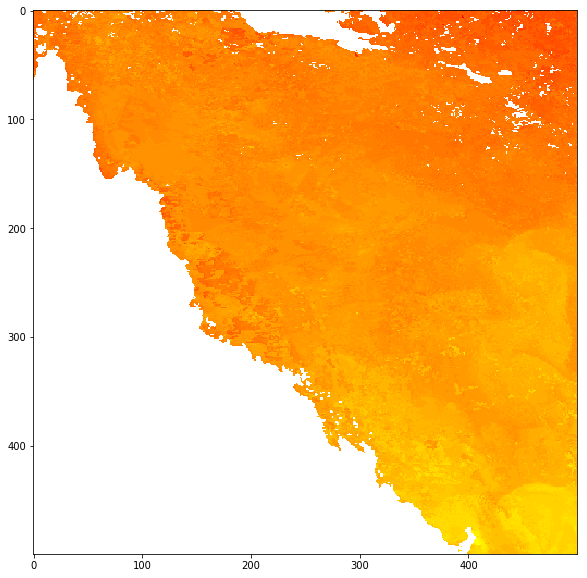

In [329]:
plt.imshow(sst_data, cmap='autumn')

## Using Matplotlib to plot a histogram of the image data

Plotting the pixel values in a histogram gives a different view of the data. The .compressed() method is used to remove the masked values from the image so they dont' show up in the plot.

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   3.00000000e+00,   3.00000000e+00,
          1.10000000e+01,   2.51200000e+03,   1.30870000e+04,
          8.36570000e+04,   4.21290000e+04,   1.46830000e+04,
          5.71400000e+03,   1.22000000e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

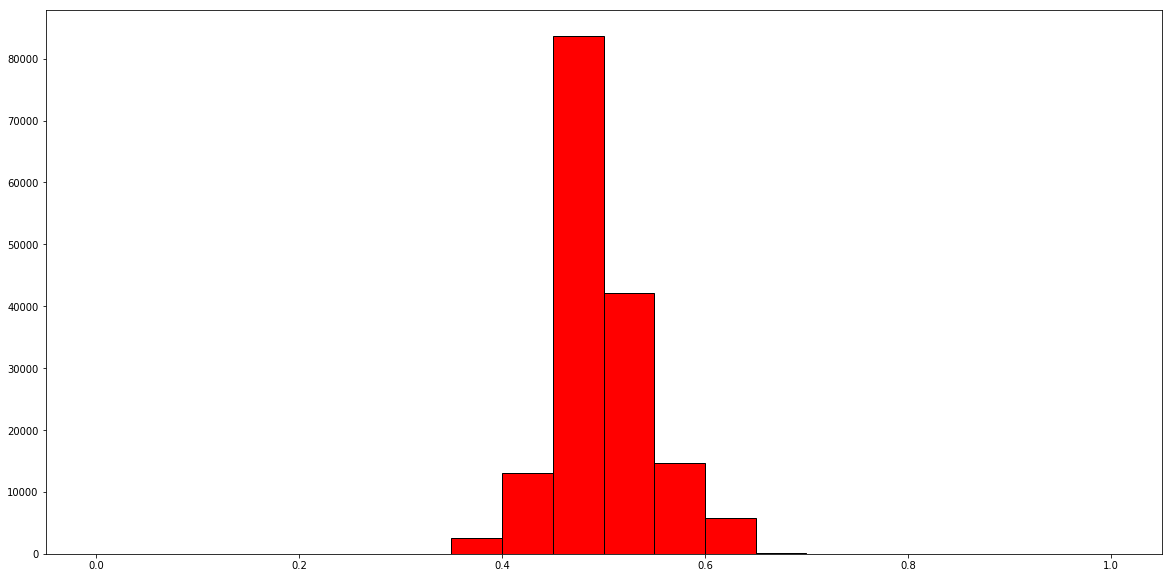

In [223]:
plt.hist(sst_data.compressed(), facecolor='red', edgecolor='black', bins=20, range=(0.00,1.00))

The histogram is showing the values in the image which range between 0.0 and 1.0. The vertical axis shows how many image pixels have values in the range on the horizontal axis. To understand how these might correspond to the underlying SST data we need to refer to the map legend for the original image.

In [330]:
legendURL=wms['sst_mosaic'].styles['boxfill/occam']['legend']

In [331]:
Image(url=legendURL)

If the legend runs from -50 to +50 we can guess that a pixel value of 1 equates to 50 degrees C and that 0 equates to 0 degrees C. So lets scale the pixel values accordingly.

In [338]:
scaled_data=sst_data*50

In [340]:
scaled_data

masked_array(data =
 [[23.33333396911621 21.764705657958984 21.764705657958984 ...,
  19.41176414489746 19.41176414489746 19.41176414489746]
 [23.33333396911621 21.764705657958984 21.764705657958984 ...,
  19.41176414489746 19.41176414489746 19.41176414489746]
 [21.764705657958984 21.764705657958984 20.980392456054688 ...,
  20.19607925415039 19.41176414489746 19.41176414489746]
 ..., 
 [-- -- -- ..., 31.176471710205078 31.176471710205078 31.176471710205078]
 [-- -- -- ..., 30.39215850830078 30.39215850830078 30.39215850830078]
 [-- -- -- ..., 29.607845306396484 29.607845306396484 29.607845306396484]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]],
       fill_value = 1e+20)

Now we have scaled data lets make a more complete plot with titles, axis labels etc. First we need a figure object with a subplot. The subplot is what we will manipulate. (this shows as an empty plot in Jupyter).

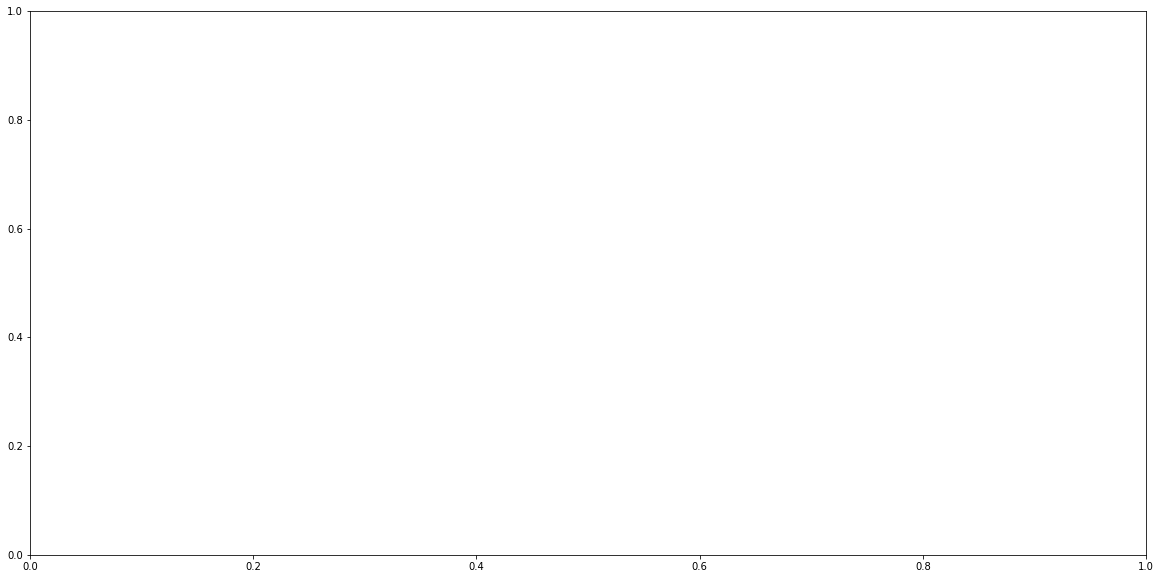

In [351]:
fig, subplot = plt.subplots(1,1)

In [352]:
subplot.hist(scaled_data.compressed(),bins=25, range=(10,35), facecolor='red', edgecolor='black')

(array([  0.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   5.00000000e+00,
          2.00000000e+00,   8.10000000e+01,   6.63000000e+02,
          1.77200000e+03,   6.80700000e+03,   6.28000000e+03,
          1.35360000e+04,   2.15960000e+04,   4.85250000e+04,
          1.80750000e+04,   1.17460000e+04,   1.23080000e+04,
          1.21930000e+04,   2.49000000e+03,   3.30900000e+03,
          2.40500000e+03,   7.30000000e+01,   2.20000000e+01,
          2.70000000e+01]),
 array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
         21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
         32.,  33.,  34.,  35.]),
 <a list of 25 Patch objects>)

In [353]:
subplot.set_xlabel('Temperature (Celsius)',fontsize=20)

Text(0.5,3.2,'Temperature (Celsius)')

In [354]:
subplot.set_ylabel('Number of image cells',fontsize=20)

Text(3.2,0.5,'Number of image cells')

In [355]:
subplot.set_title('Distribution of Sea Surface Temperatures derived from WMS image ' + most_recent_date,fontsize=24)

Text(0.5,1,'Distribution of Sea Surface Temperatures derived from WMS image 2017-10-30T15:20:00.000Z')

Finally, we have a histogram that shows the spread of Sea Surface Temperatures for the most recent date available from the WMS.

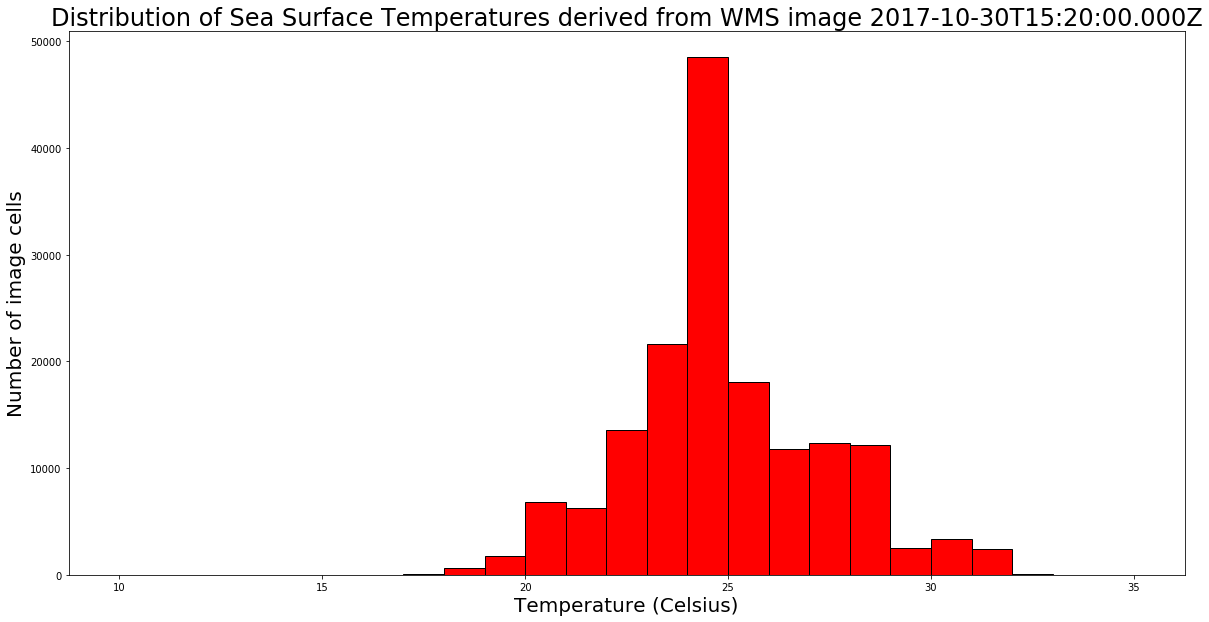

In [261]:
display(fig)